## GRIP - Sparks Foundation
## Task no. 2 : Prediction using unsupervised ML
## Submitted by : Abel Rasheed

## KMeans clustering algorithm

* In this notebook, i've implemented a Kmeans clustering algorithm on the Iris dataset
* The algorithm is written from scratch, even though sklearn library is imported to use a few helper functions, ie MinMaxScaler() and ElbowGraph


### Importing required libraries...
* Kmeans_own is the class I wrote which instantiates a Kmeans object which will be our training model, which is imported from kmeans.py


In [46]:
import math
from kmeans import Kmeans_own, distance, initialize_centroids
import csv
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

### loading the data

In [2]:
with open('Iris.csv' , 'r') as csv_file:
    data = []
    csv_reader = csv.reader(csv_file) 
    for line in csv_reader:
        temp_line = line[1:-1]
        data.append(temp_line)

In [3]:
data.remove(data[0])

In [47]:
data = np.array(data).astype(float)

### Scaling the data so as to perform efficiently

In [5]:
scaler = MinMaxScaler().fit(data)

In [6]:
scaled_data  = scaler.transform(data)

### Drawing an elbow graph to find the optimum number of clusters

In [12]:
modelsk = KMeans()

In [33]:
visualizer = KElbowVisualizer(modelsk, k=(1,12))

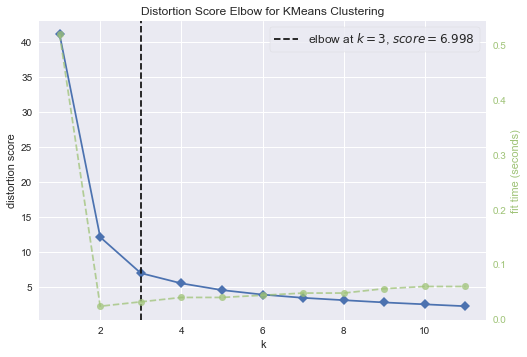

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
visualizer.fit(scaled_data)      
visualizer.show()

### Here from the elbow plot we can see that the optimum no. of clusters is 3
### Therefore instantiating a Kmeans_own object with no. of clusters = 3

In [35]:
model = Kmeans_own(scaled_data, K=3)

## Training the model

In [36]:
result,centroids = model.train()

In [37]:
indices0 = [i for i in range(len(result)) if result[i] == 0]
indices1 = [i for i in range(len(result)) if result[i] == 1]
indices2 = [i for i in range(len(result)) if result[i] == 2]

In [38]:
data_index0 = scaled_data[indices0]
data_index1 = scaled_data[indices1]
data_index2 = scaled_data[indices2]

In [39]:
plt.style.use('seaborn')

# Visualizing the clusters

* There are a total of 4 features in this dataset, so the model is 4 - dimensional
* Obviously we cannot visualize a 4 dimensional graph, so what I've done is I've plotted every other feature with  each other with the help of six 2- dimensional graphs
* The different clusters are marked with different colors.
* The centroid of each cluster is marked with 'x' in the same color as the cluster is

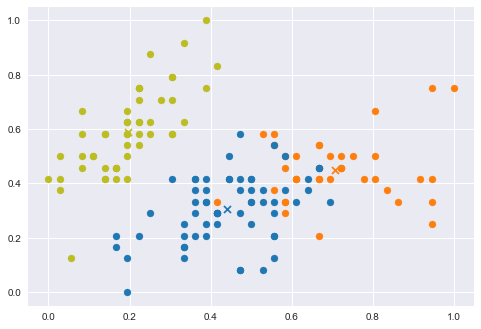

In [40]:
plt.scatter(data_index0[:,0],data_index0[:,1] , c='#ff7f0e')
plt.scatter(centroids[0][0],centroids[0][1] , c='#ff7f0e', marker="x")
plt.scatter(data_index1[:,0],data_index1[:,1] , c='#1f77b4')
plt.scatter(centroids[1][0],centroids[1][1] , c='#1f77b4', marker="x")
plt.scatter(data_index2[:,0],data_index2[:,1] , c='#bcbd22')
plt.scatter(centroids[2][0],centroids[2][1] , c='#bcbd22', marker="x")

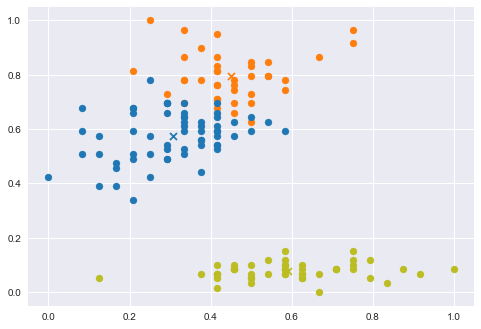

In [41]:
plt.scatter(data_index0[:,1],data_index0[:,2] , c='#ff7f0e')
plt.scatter(centroids[0][1],centroids[0][2] , c='#ff7f0e', marker="x")
plt.scatter(data_index1[:,1],data_index1[:,2] , c='#1f77b4')
plt.scatter(centroids[1][1],centroids[1][2] , c='#1f77b4', marker="x")
plt.scatter(data_index2[:,1],data_index2[:,2] , c='#bcbd22')
plt.scatter(centroids[2][1],centroids[2][2] , c='#bcbd22', marker="x")

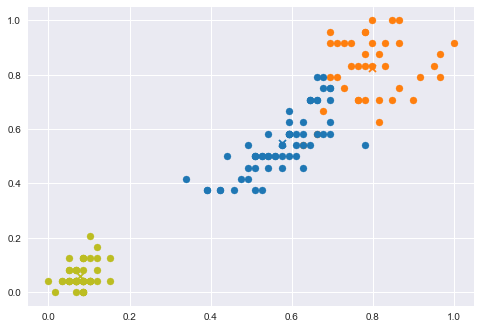

In [42]:
plt.scatter(data_index0[:,2],data_index0[:,3] , c='#ff7f0e')
plt.scatter(centroids[0][2],centroids[0][3] , c='#ff7f0e', marker="x")
plt.scatter(data_index1[:,2],data_index1[:,3] , c='#1f77b4')
plt.scatter(centroids[1][2],centroids[1][3] , c='#1f77b4', marker="x")
plt.scatter(data_index2[:,2],data_index2[:,3] , c='#bcbd22')
plt.scatter(centroids[2][2],centroids[2][3] , c='#bcbd22', marker="x")

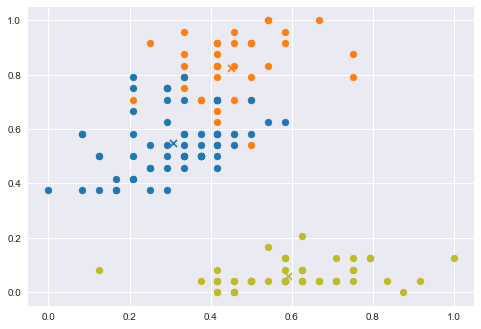

In [43]:
plt.scatter(data_index0[:,1],data_index0[:,3] , c='#ff7f0e')
plt.scatter(centroids[0][1],centroids[0][3] , c='#ff7f0e', marker="x")
plt.scatter(data_index1[:,1],data_index1[:,3] , c='#1f77b4')
plt.scatter(centroids[1][1],centroids[1][3] , c='#1f77b4', marker="x")
plt.scatter(data_index2[:,1],data_index2[:,3] , c='#bcbd22')
plt.scatter(centroids[2][1],centroids[2][3] , c='#bcbd22', marker="x")

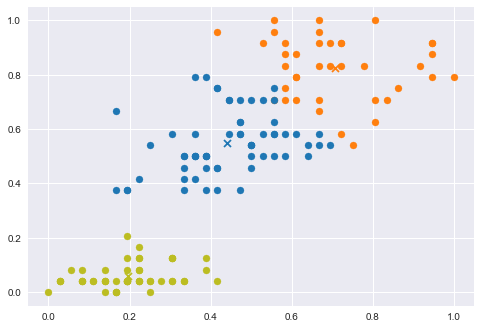

In [44]:
plt.scatter(data_index0[:,0],data_index0[:,3] , c='#ff7f0e')
plt.scatter(centroids[0][0],centroids[0][3] , c='#ff7f0e', marker="x")
plt.scatter(data_index1[:,0],data_index1[:,3] , c='#1f77b4')
plt.scatter(centroids[1][0],centroids[1][3] , c='#1f77b4', marker="x")
plt.scatter(data_index2[:,0],data_index2[:,3] , c='#bcbd22')
plt.scatter(centroids[2][0],centroids[2][3] , c='#bcbd22', marker="x")

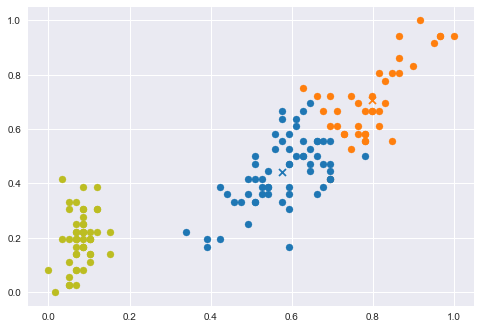

In [45]:
plt.scatter(data_index0[:,2],data_index0[:,0] , c='#ff7f0e')
plt.scatter(centroids[0][2],centroids[0][0] , c='#ff7f0e', marker="x")
plt.scatter(data_index1[:,2],data_index1[:,0] , c='#1f77b4')
plt.scatter(centroids[1][2],centroids[1][0] , c='#1f77b4', marker="x")
plt.scatter(data_index2[:,2],data_index2[:,0] , c='#bcbd22')
plt.scatter(centroids[2][2],centroids[2][0] , c='#bcbd22', marker="x")

# Some datapoints aren't  perfectly assigned, but that's okay. 
# Overall the algorithm did a decent job clustering the data in the iris dataset


# Thank You !